# Linear Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic linear algebra with Numpy

To create arrays of random elements, you can use `np.random.randn()` for example. This is convenient to get arrays full of values just to check how operations work. 

**NOTE**: It can be useful to set the seed for the pseudorandom number generator. This allows you to reproduce resuls involving a random number generator. For example, if you and your neighbour do both execute the following code:
```python
np.random.seed(1234)
np.random.rand()
```
you will see exactly the same result: `0.1915194503788923`

Set the random seed as `1337` and use `np.random.randn()` to create 3 objects:
* two numpy vectors, `v` and `w`, with `10` elements
* and a square numpy array `M` of `10x10` elements.

In [2]:
# Set a random seed and create v, w, and M
# "seed" the random number generator => everyone gets the same results
np.random.seed(1337)

# create vectors and matrices to test things out
v  = np.random.randn(10)
w  = np.random.randn(10)
M  = np.random.randn(10, 10)

v, w, M


(array([-0.70318731, -0.49028236, -0.32181433, -1.75507872,  0.20666447,
        -2.01126457, -0.55725071,  0.33721701,  1.54883597, -1.37073656]),
 array([ 1.4252914 , -0.27946391, -0.55962791,  1.18638337,  1.69851891,
        -1.69122016, -0.69952284,  0.58296284,  0.97822263, -1.21737211]),
 array([[-1.32939545e+00, -1.45474227e-03, -1.31465268e+00,
         -3.79611743e-01,  1.26521065e+00,  1.20667744e-01,
          1.47941778e-01, -2.75372579e+00, -3.56896324e-01,
          7.71783656e-03],
        [ 1.47827716e+00, -9.57614629e-01,  1.32900811e+00,
         -9.85849630e-01,  4.71557202e-01, -8.74652950e-03,
          3.67018689e-01,  1.11855474e+00, -8.38993512e-03,
          4.66315379e-01],
        [ 1.26326870e+00, -9.01654654e-01, -1.02884269e+00,
          5.69678421e-01,  6.41664780e-01,  2.59811930e-01,
          1.19317814e+00, -1.04630036e+00,  1.39888921e-01,
         -1.73065584e+00],
        [-1.30623116e-01, -1.31026002e+00, -2.17131242e+00,
         -1.06618141e+0

### Norms and inner products

* compute the (0,1 and 2) norm of `v` using `np.linalg.norm`
* compute these norms 'manually' (i.e. use the formula as opposed to `np.linalg.norm`) and check that you get the same results
* compute $\langle v,w\rangle$ using a sum (like the mathematical formula) and check against `np.dot`
* compute $\langle v,v \rangle$ using `np.dot`, compare it with $\|v\|_2^2$ (the L2 norm squared)

N.B. There are different ways to do dot products using numpy:

```python
np.dot(v, w)  # using a function
v @ w  # an operator
v.dot(w)  # or a method
```

In [3]:
# add your code here to compute the norms of v using linalg
for ii in range(3):
    print("{0}-norm: {1:.2f}".format(ii, np.linalg.norm(v, ii)))

# add your code here to compute the norms manually and check

print("\n-- manually --")
# (v != 0) is a vector of trues/falses, sum counts the number of trues.
print("0-norm: {0:.2f}".format((v != 0).sum()))
print("1-norm: {0:.2f}".format((np.abs(v)).sum()))
# **2 means "squared", on a numpy array it squares all entries
print("2-norm: {0:.2f}".format(np.sqrt(((v**2).sum()))))

# add your code here to compute <v, w> and compare with np.dot
print("\n-- dot prod --")
lhs = np.dot(v, w) # <v, w>
rhs = sum(v[ii]*w[ii] for ii in range(len(v))) # explicit computation of <v, w>
# the difference should be tiny
e1 = np.abs(lhs - rhs)
print("error1: {0:.2e}".format(e1)) 
print("effectively equal? {}".format(np.allclose(lhs, rhs)))

# add your code here to compute <v,v> and compare with the norm
lhs = np.dot(v, v) # <v, v>
rhs = np.linalg.norm(v)**2 # sum of squared entries
# the difference should be tiny
e2 = np.abs(lhs - rhs)
print("error2: {0:.2e}".format(e2))
print("effectively equal? {}".format(np.allclose(lhs, rhs)))



0-norm: 10.00
1-norm: 9.30
2-norm: 3.56

-- manually --
0-norm: 10.00
1-norm: 9.30
2-norm: 3.56

-- dot prod --
error1: 8.88e-16
effectively equal? True
error2: 0.00e+00
effectively equal? True


### Cosine similarity

Write a short function (or lambda) taking two vectors and returning the cosine similarity. It is computed as

$$c_\text{sim}(x,y) := {\langle x, y \rangle \over \|x\|_2\|y\|_2}$$

This is also defined as $c_\text{sim}(x,y) = cos(\theta)$ where $\theta$ is the angle between the vectors. Given this information, what is the range of possible values?

In [4]:
# add your code here to define the cossim function
def cossim(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    return numerator / denominator


Then consider the four points $\{(5,7),(3,8),(-2,1.5),(0,-3)\}$ and the corresponding vectors (from the origin). Display those points with a large marker and display a line connecting them to the origin `(0, 0)`. 
Call them $x_1,\dots,x_4$ using the `label` option of `plt.plot`. 

* add a legend
* make the axes have the same scale ("axis equal")

[[ 0.   0. ]
 [ 5.   7. ]
 [ 3.   8. ]
 [-2.   1.5]
 [ 0.  -3. ]]


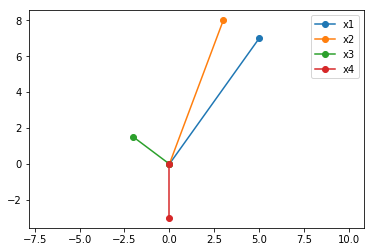

In [5]:
# define the points, display them, add a legend and equalise the axes
x1  = np.array([5, 7])
x2  = np.array([3, 8])
x3  = np.array([-2, 1.5])
x4  = np.array([0, -3])
# make one matrix out of these points, the first point being the origin
pts = np.vstack((np.zeros(2), x1, x2, x3, x4))
print(pts)

# display the vectors, for each point, they go from (0, 0) to the point
for ii in range(1, 5):
    plt.plot(
        pts[[0, ii], 0],
        pts[[0, ii], 1], 
        marker='o', label="x{}".format(ii))

plt.legend()

plt.axis('equal')
plt.show()


Finally, compute the cosine similarity between $x_1$ and all the other vectors:

* $c_\text{sim}(x_1,x_2)$
* $c_\text{sim}(x_1,x_3)$
* $c_\text{sim}(x_1,x_4)$

Look at the plot above and verify that these numbers make sense. Think about the the angle between the vectors $\theta$ (check the definition above if stuck).

In [6]:
# add your code here to display the cosine similarities
print("Cosine similarity between x1 and x2: {0:.2f} (~ aligned)".format(cossim(x1,x2)))
print("Cosine similarity between x1 and x3: {0:.2f} (~ orthogonal)".format(cossim(x1,x3)))
print("Cosine similarity between x1 and x4: {0:.2f} (~ anti-aligned)".format(cossim(x1,x4)))


Cosine similarity between x1 and x2: 0.97 (~ aligned)
Cosine similarity between x1 and x3: 0.02 (~ orthogonal)
Cosine similarity between x1 and x4: -0.81 (~ anti-aligned)


### Basic matrix vector operations

* Compute $M^tv$ explicitly using a sum and compare using `.T` (transpose) and `np.dot`
* Show that the $i^{th}$ value of product $Mv$ equals the dot product of the $i^{th}$ row of $M$ with $v$
    * in other words that $(Mv)_i = \langle M_{i,:}, v \rangle$ for some $i$ (use `np.random.randint` to generate an index)
* Similarly show that $(M^tv)_i = \langle M_{:,i}, v \rangle$ for some $i$

*The aim of this exercise is to familiarise yourself with the links between linear algebra formulas and how they are coded. If you struggle a bit through these exercises, don't worry and come back to them in your own time. We strongly recommend you do them by hand first.*

**Note**: remember that to check if two vectors $x$ and $z$ are close, you can compute $\|x-z\|$ and it should be small!

In [7]:
# add your code to compute M^tv explicitly and compare
r = np.zeros(len(v))

for col in range(len(v)):
    for row in range(len(v)):
        # whatch the ordering due to transpose
        r[col] += M[row, col] * v[row]
    
r_direct = np.dot(M.T, v)

# r and r_direct should be identical. So the norm of their difference
# should be tiny (~ the zero vector). 
e1 = np.linalg.norm(r_direct - r)
print("error1: {0:.2e}".format(e1))

# add your code to compare (Mv)_i with <M_i:, v> for some i
# let's pick an i at random
i  = np.random.randint(len(v))
lhs = np.dot(M[i,:], v) # <M_i:, v>
rhs = np.dot(M, v)[i]   # (Mv)_i
e2 = np.abs(lhs - rhs)
print("error2: {0:.2e}".format(e2))

# add your code to compare (M^tv)_i with <M_:i, v> for some i
# pick an i at random
i  = np.random.randint(len(v))
lhs = np.dot(M[:,i], v) # <M_:i, v>
rhs = np.dot(M.T, v)[i] # (M^tv)_i
e2 = np.abs(lhs - rhs)
print("error3: {0:.2e}".format(e2))


error1: 1.03e-15
error2: 4.44e-16
error3: 1.11e-16
